In [8]:
import pandas as pd


In [10]:
pokemon='Pokemon.csv'
Pokemon_data = pd.read_csv(pokemon)

In [12]:
Pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [14]:
Pokemon_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [15]:
Pokemon_data = Pokemon_data.dropna(axis=0)

In [18]:
Pokemon_features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X=Pokemon_data[Pokemon_features]

In [19]:
Y = Pokemon_data['Type 1']

In [22]:
X.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
6,78,84,78,109,85,100


In [23]:
X.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493
std,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408
min,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000
25%,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000
50%,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000
75%,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000
max,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder = OneHotEncoder(sparse_output=False)
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

In [28]:
from sklearn.preprocessing import StandardScaler


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
Pokemon_model = DecisionTreeRegressor(random_state=1)


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [116]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_Y, val_Y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_Y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_Y, predict_val)
    return(model.tree_)

In [118]:
from sklearn.linear_model import LogisticRegression

In [120]:
import pandas as pd

In [122]:
Pokemon_data = pd.read_csv('pokemon.csv')

In [124]:
Pokemon_data['CAS'] = Pokemon_data['Attack'] + Pokemon_data['Sp. Atk'] + Pokemon_data['Speed'] * 0.5

In [126]:
X = Pokemon_data[['HP', 'Defense', 'Sp. Def']]
Y = Pokemon_data['CAS'] 

In [128]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [132]:
from sklearn.linear_model import LinearRegression

In [134]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [136]:
Y_pred = model.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error

In [140]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 3117.11


In [142]:
import matplotlib.pyplot as plt

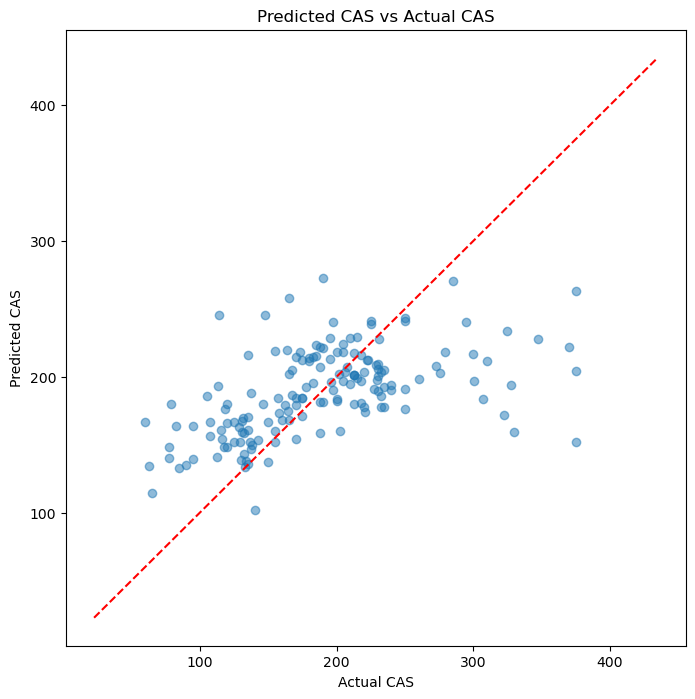

In [144]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--') 
plt.xlabel('Actual CAS')
plt.ylabel('Predicted CAS')
plt.title('Predicted CAS vs Actual CAS')
plt.show()

In [146]:
import seaborn as sns

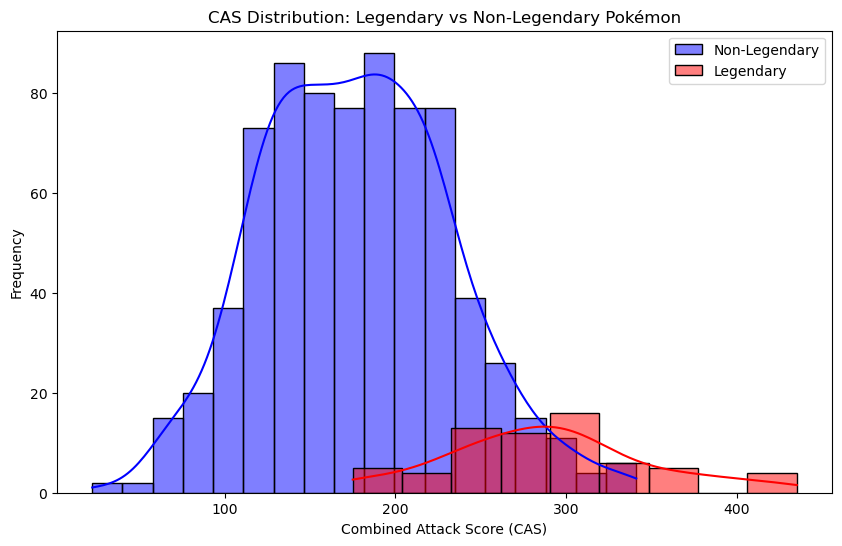

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(Pokemon_data[Pokemon_data['Legendary'] == False]['CAS'], label='Non-Legendary', color='blue', kde=True)
sns.histplot(Pokemon_data[Pokemon_data['Legendary'] == True]['CAS'], label='Legendary', color='red', kde=True)
plt.xlabel('Combined Attack Score (CAS)')
plt.ylabel('Frequency')
plt.title('CAS Distribution: Legendary vs Non-Legendary Pokémon')
plt.legend()
plt.show()

In [149]:
legendary_cas_range = (Pokemon_data[Pokemon_data['Legendary'] == True]['CAS'].min(), Pokemon_data[Pokemon_data['Legendary'] == True]['CAS'].max())

non_legendary_close_to_legendary = Pokemon_data[(Pokemon_data['Legendary'] == False) & 
                                      (Pokemon_data['CAS'] >= legendary_cas_range[0]) & 
                                      (Pokemon_data['CAS'] <= legendary_cas_range[1])]

In [152]:
print(non_legendary_close_to_legendary[['Name', 'CAS']])

                          Name    CAS
2                     Venusaur  222.0
3        VenusaurMega Venusaur  262.0
5                   Charmeleon  184.0
6                    Charizard  243.0
7    CharizardMega Charizard X  310.0
..                         ...    ...
785        GourgeistSmall Size  192.5
786        GourgeistLarge Size  187.5
787        GourgeistSuper Size  185.0
789                    Avalugg  175.0
791                    Noivern  228.5

[374 rows x 2 columns]


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [180]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print()

Logistic Regression:
Accuracy: 0.93125
F1-Score: 0.6451612903225806

Random Forest:
Accuracy: 0.93125
F1-Score: 0.5925925925925926



In [181]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, Y_train)
y_pred = best_model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [184]:
y_test_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Test F1-Score: {f1_score(y_test, y_test_pred)}")

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'